1.1. Wybierz ze zbioru Plantdoc podzbiór kilkudziesięciu zdjęć przedstawiających 
trzy choroby roślin jednego gatunku (np. 3 choroby ziemniaków lub 3 choroby 
pomidorów).

1.2. Wczytaj zdjęcia do pamięci. Po wczytaniu każde zdjęcie będzie trójwymiarowym 
tensorem. Pomocna będzie biblioteka imageio lub Pillow.

1.3. Przeskaluj wszystkie zdjęcia do rozdzielczości 224×224, tak aby wszystkie 
obrazy miały ten sam rozmiar, równy 224×224×3.

1.4. Skonwertuj obrazy do skali szarości, tak aby z trójwymiarowego 
tensorareprezentującego dane zdjęcie otrzymać tablicę dwuwymiarową

In [1]:
import os
import numpy as np
from PIL import Image

# import all photos from given directory
dir_path = "./photos/"
photos = []
for file in os.listdir(dir_path):
    if file.endswith(".jpg"):
        im = Image.open("./photos/"+file)
        #rescale im image to 224 x 224
        im = im.resize((224, 224))
        # convert to grayscale
        im = im.convert('L')
        
        photos.append(np.array(im))
photos = np.array(photos)

1.5. Skonwertuj obrazy, będące teraz tablicami dwuwymiarowymi (macierzami) na 
wektory.

In [2]:
import numpy as np

# konwersja do wektorów
images_vectorized = []
for image in photos:
    image_vectorized = image.reshape(-1)
    images_vectorized.append(image_vectorized)
images_vectorized = np.array(images_vectorized)


1.6. Przeprowadź standaryzację obrazów, czyli od każdego obrazu odemij średni 
obraz, a następnie podziel przez odchylenie standardowe.

In [3]:
# standaryzacja obrazów
X = (images_vectorized - np.mean(images_vectorized, axis=0)) / np.std(images_vectorized, axis=0)

2.1.  Wykonaj transformację PCA.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60)
X_pca = pca.fit_transform(X)

2.2. Jak wyglądała dla tego zbioru macierz kowariancji przed transformacjąPCA, a 
jak po jej wykonaniu?

Kod nie jest do wykonania ponieważ mój komputer nie może wyrobić na zużyciu procesora i pamięci ram na 100% c:

In [5]:
"""
covariance_matrix_before = np.cov(X.T)
covariance_matrix_after = pca.get_covariance()
"""

'\ncovariance_matrix_before = np.cov(X.T)\ncovariance_matrix_after = pca.get_covariance()\n'

2.3. Jak wyglądało średnie zdjęcie, które odjęliśmy od pozostałych, by wycentrować 
zbiór?

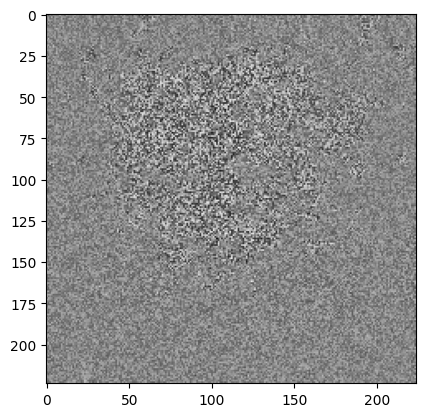

In [6]:
mean_image = np.mean(X, axis=0)
import matplotlib.pyplot as plt
plt.imshow(mean_image.reshape((224, 224)), cmap='gray')

plt.show()

2.4. Jak wyglądają znalezione nowe wektory bazowe (czyli główne składowe,ang. 
principal components)? Zaprezentuj je posortowane według powiązanej 
wariancji.


In [7]:
# wektory bazowe
components = pca.components_

# posortowanie wektorów bazowych według powiązanej wariancji
sorted_indices = np.argsort(pca.explained_variance_)[::-1]
sorted_components = components[sorted_indices]


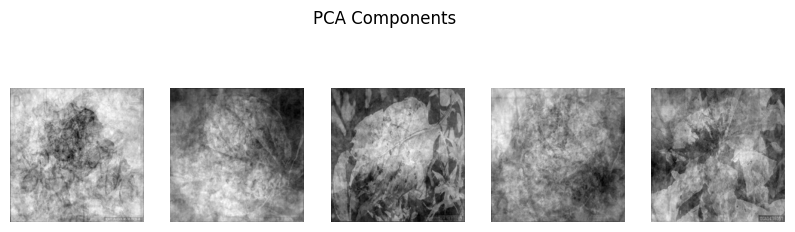

In [8]:
import matplotlib.pyplot as plt

# funkcja pomocnicza do wyświetlenia obrazów
def plot_images(images, title):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 3))
    fig.suptitle(title)
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')

# wyświetlenie wektorów bazowych jako obrazów
plot_images(sorted_components[:5].reshape(-1, 224, 224), 'PCA Components')


2.5. Skonwertuj obrazy, będące teraz tablicami dwuwymiarowymi (macierzami) na 
wektory.

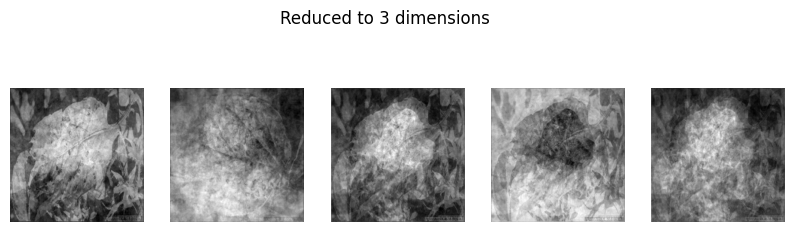

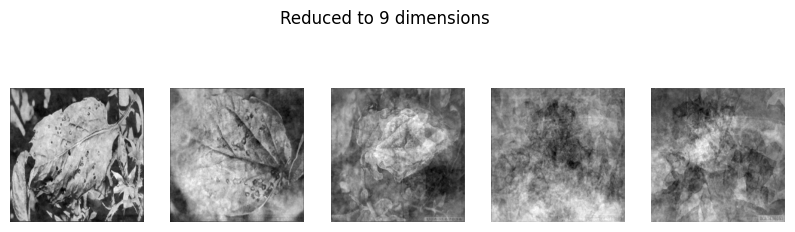

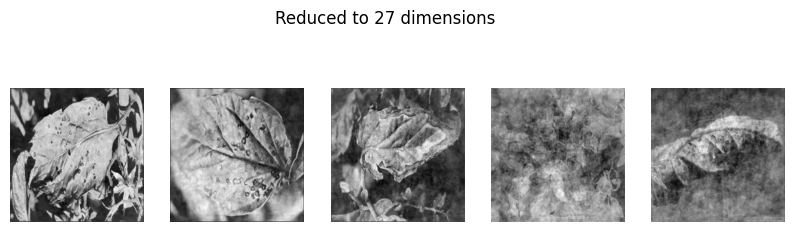

In [9]:
# liczba wymiarów do redukcji
dimensions = [3, 9, 27]

# lista przechowująca zredukowane obrazy
reduced_images = []

for d in dimensions:
    # stworzenie instancji klasy PCA
    pca = PCA(n_components=d)

    # przeprowadzenie PCA na danych
    X_pca = pca.fit_transform(X)

    # odwrotna transformacja PCA
    X_reduced = pca.inverse_transform(X_pca)

    # dodanie zredukowanych obrazów do listy
    reduced_images.append(X_reduced)

# wyświetlenie zredukowanych obrazów
for i, d in enumerate(dimensions):
    plot_images(reduced_images[i][:5].reshape(-1, 224, 224), f'Reduced to {d} dimensions')


2.6. Przedstaw wykres wariancji wyjaśnionej.

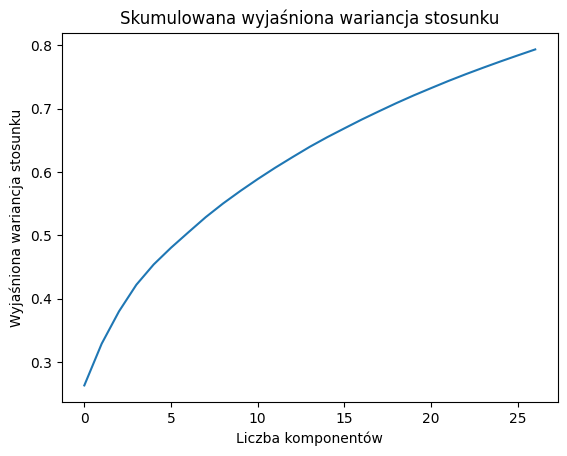

In [10]:
# wykres wariancji wyjaśnionej
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba komponentów')
plt.ylabel('Wyjaśniona wariancja stosunku')
plt.title('Skumulowana wyjaśniona wariancja stosunku')
plt.show()
